In [4]:
# logistic regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.columns
#df.shape

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

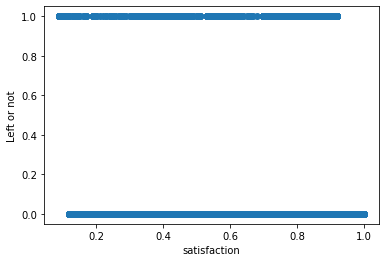

In [13]:
%matplotlib inline
plt.xlabel('satisfaction')
plt.ylabel('Left or not')
plt.scatter(df.satisfaction_level,df.left)


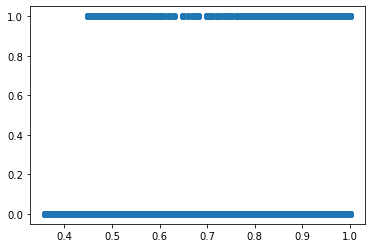

In [14]:
plt.scatter(df.last_evaluation,df.left)

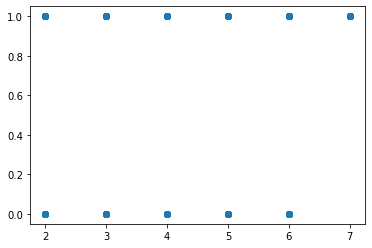

In [15]:

plt.scatter(df.number_project,df.left)

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

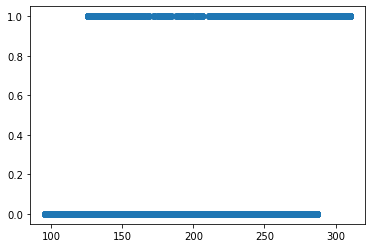

In [17]:
plt.scatter(df.average_montly_hours,df.left)

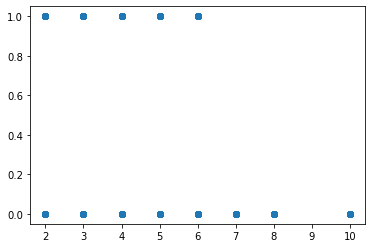

In [18]:
plt.scatter(df.time_spend_company,df.left)

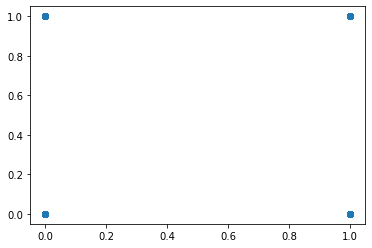

In [19]:
plt.scatter(df.Work_accident,df.left)

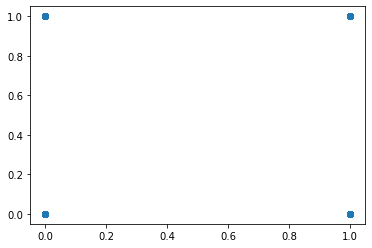

In [20]:

plt.scatter(df.promotion_last_5years,df.left)

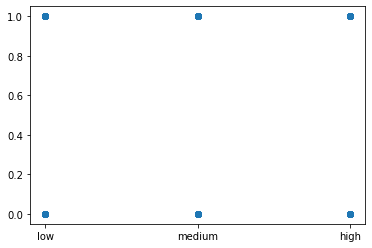

In [23]:

plt.scatter(df.salary,df.left)

In [26]:
left = df[df.left==1]
left.shape

(3571, 10)

In [28]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [32]:
 df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [36]:
ct = pd.crosstab(df.salary,df.left)
ct


left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


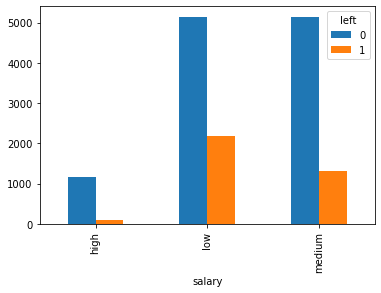

In [39]:
ct.plot(kind = 'bar')

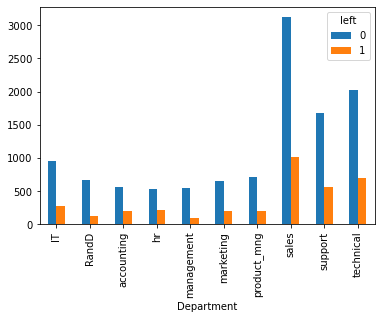

In [41]:
# departement wise empluyee retension relation
df.columns
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

In [43]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [101]:
model = LogisticRegression()

X_train,X_test ,y_train,y_test = train_test_split(subdf,df.left , test_size=0.2, random_state = 10)

In [102]:
X_train.shape


(11999, 4)

In [103]:
X_test.shape

(3000, 4)

In [104]:
salary_dummies = pd.get_dummies(X_train['salary'], prefix = 'salary',drop_first = True)
salary_dummies.head()
#model.fit(X_train,y_train)


,salary_low,salary_medium
13388,0,1
6481,0,1
1494,1,0
2518,0,1
9958,1,0


In [105]:
X_train = pd.concat([X_train , salary_dummies] ,axis = 1)
X_train.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_low,salary_medium
13388,0.85,260,0,medium,0,1
6481,0.77,187,0,medium,0,1
1494,0.17,188,0,low,1,0


In [106]:
#X_train.drop(['salary'], inplace = True)
X_train.drop(columns='salary', inplace = True)
X_train.head(2)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
13388,0.85,260,0,0,1
6481,0.77,187,0,0,1


In [107]:
model.fit(X_train,y_train)

LogisticRegression()

In [108]:
X_test.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
13982,0.65,125,0,low
822,0.41,128,0,low
13751,0.44,125,0,medium
9656,0.93,190,0,medium
13497,0.76,170,0,medium


In [109]:
salary_dummies_test = pd.get_dummies(X_test['salary'],drop_first = True)
salary_dummies_test.head(2)

,low,medium
13982,1,0
822,1,0


In [110]:
X_test = pd.concat([X_test,salary_dummies_test], axis = 1).drop(columns= 'salary')


In [113]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
13982,0.65,125,0,1,0
822,0.41,128,0,1,0
13751,0.44,125,0,0,1
9656,0.93,190,0,0,1
13497,0.76,170,0,0,1


In [115]:
model.score(X_test,y_test)

0.7706666666666667

In [116]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

model.predict_proba(X_test)

In [117]:
model.predict_proba(X_test)


array([[0.79706549, 0.20293451],
       [0.61109966, 0.38890034],
       [0.74276836, 0.25723164],
       ...,
       [0.4230162 , 0.5769838 ],
       [0.92938055, 0.07061945],
       [0.70753629, 0.29246371]])